In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
df.shape

(76020, 371)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
# 1. 문제 정의 고객 만족도를 낮추는 요인 규명 → 만족/불만족 예측
print(df['TARGET'].value_counts())
discontent_cnt = df[df['TARGET']==1].TARGET.count()
total_cnt = df.TARGET.count()
print("discontent_cnt 비율은 {0:.2f}".format((discontent_cnt/total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
discontent_cnt 비율은 0.04


# 1. 문제 정의
## 1) 만족 / 불만족 수치
- 만족(0): 73,012명
- 불만족(1): 3,008명
- 불만족비율 : 0.04%

-> 불만족 고객수 3,008명 대상으로 예측해야할 값의 분포: 약4%

In [6]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


# 2. 데이터 이해
## 1. 탐색적 분석
- var3 컬럼의 min 값이 -999999.000000 (이상치)
- ID 컬럼은 분석에 무의미해 보임

In [8]:
# 이상치 제거 (var3 (min) : -999999.000000)
df.columns[df[df==-999999.000000].sum() !=0.0]

Index(['var3'], dtype='object')

In [9]:
print(df['var3'].value_counts())

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 63            1
 194           1
 40            1
 57            1
 87            1
Name: count, Length: 208, dtype: int64


In [10]:
df['var3'] = [2 if x == -999999.000000 else x for x in df['var3']]
print(df['var3'].value_counts())

var3
2      74281
8        138
9        110
3        108
1        105
       ...  
63         1
194        1
40         1
57         1
87         1
Name: count, Length: 207, dtype: int64


In [11]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [12]:
df = df.drop('ID', axis=1)
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [13]:
print(df.shape)
df.describe()

(76020, 370)


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,2.716483,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,9.447971,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


# 3. 데이터 전처리

## 1. 이상치 및 불필요 칼럼 제거 완료
- var3 (min) : -999999.000000 -> 0
- column 371 -> 370

In [14]:
X_features = df.drop(['TARGET'], axis=1)
y_target = df['TARGET']

X_features.shape, y_target.size

((76020, 369), 76020)

## 1) 피처 데이터 셋 만들기

- 피처 데이터 셋 : TARGET 칼럼을 제외한 칼럼들로 구성
- 학습과 검정을 위해 학습 데이터와 테스트 데이터 세트로 분리

In [21]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=37)
print(f"학습 세트 Shape:{X_train.shape} 테스트 세트 Shape:{X_test.shape}")

학습 세트 Shape:(60816, 369) 테스트 세트 Shape:(15204, 369)


## 2) 데이터 분리 현황
학습 데이터와 테스트 데이터가 7:3 의 비율로 분리됨   
기존 데이터에서 TARGET 값의 1의 빈도가 4%인 비대칭한 데이터 세트이므로    


In [24]:
train_cnt = y_train.count()
test_cnt = y_test.count()

print(f"학습 세트 레이블 값 분포 비율 \n {y_train.value_counts()/train_cnt}")
print(f"\n 테스트 세트 레이블 값 분포 비율 \n {y_test.value_counts()/test_cnt}")

학습 세트 레이블 값 분포 비율 
 TARGET
0    0.960339
1    0.039661
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율 
 TARGET
0    0.9608
1    0.0392
Name: count, dtype: float64


## 3) 각 데이터에서의 라벨(Target) 값의 분포가 비슷한지 추출 여부 확인
- 출력 결과    
학습 데이터 세트와 테스트 데이터 세트의 TARGET 값의 분포가    
원본 데이터의 분포와 유사하게 전체 데이터의 4% 정도의 불만족 값(1)로 형성되어 있다.

In [26]:
# XGBoost 분류기로 학습/검정을 실시
# XGBClassifier 객체를 만들어주고 분류기는 500개로 설정

from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=500, random_state = 37)
xgb_clf.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82571	validation_1-auc:0.79957
[1]	validation_0-auc:0.83511	validation_1-auc:0.80638
[2]	validation_0-auc:0.84038	validation_1-auc:0.81397
[3]	validation_0-auc:0.84474	validation_1-auc:0.81571
[4]	validation_0-auc:0.84842	validation_1-auc:0.81712
[5]	validation_0-auc:0.85413	validation_1-auc:0.82387
[6]	validation_0-auc:0.85699	validation_1-auc:0.82611
[7]	validation_0-auc:0.86028	validation_1-auc:0.82832
[8]	validation_0-auc:0.86306	validation_1-auc:0.83125
[9]	validation_0-auc:0.86535	validation_1-auc:0.83255
[10]	validation_0-auc:0.86922	validation_1-auc:0.83208
[11]	validation_0-auc:0.87214	validation_1-auc:0.83246
[12]	validation_0-auc:0.87371	validation_1-auc:0.83256
[13]	validation_0-auc:0.87699	validation_1-auc:0.83299
[14]	validation_0-auc:0.87881	validation_1-auc:0.83269
[15]	validation_0-auc:0.88038	validation_1-auc:0.83254
[16]	validation_0-auc:0.88207	validation_1-auc:0.83446
[17]	validation_0-auc:0.88374	validation_1-auc:0.83298
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=37,
              reg_alpha=0, reg_lambda=1, ...)

## 4) XGB 분류기를 학습 데이터 셋으로 학습시키기

- early_stopping_rounds라는 옵션
XGBoost 모델은 GBM 과는 달리 조기 중단 기능을 제공해 알고리즘 수행 시간을 절약할 수 있다.

- early_stopping_rounds = 100
특정 값에서 100번의 시행 동안 더 나은 결과가 없다면 실행을 종료한다. 

- 결과 지표 (eval_metric = 'auc'의 auc 값) 

- 결과를 검정하는 세트는 학습 데이터세트, 검정 데이터세트로 구성한다.

In [28]:
from sklearn.metrics import roc_auc_score

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print(f"ROC AUC: {xgb_roc_score:.4f}")

ROC AUC: 0.8345


## 5) 분류 모델의 구분 수치 확인
- ROC AUC: 0.8345   
(1에 가까울수록 완벽한 예측)

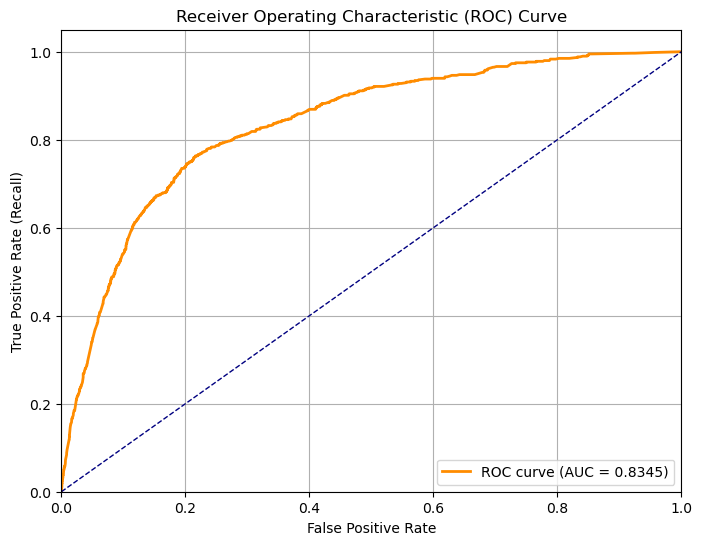

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 예측 확률
xgb_proba = xgb_clf.predict_proba(X_test)[:, 1]

# FPR, TPR 계산
fpr, tpr, thresholds = roc_curve(y_test, xgb_proba)

# AUC 계산
roc_auc = auc(fpr, tpr)

# 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # 랜덤 예측선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [31]:
from sklearn.model_selection import GridSearchCV
import time

# XGBoost 수행 시간 측정 위한 time
start_time = time.time()

# 수행시간 단축을 위해 분류기 100개로 설정
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7],'min_Child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)

gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train,y_train), (X_test, y_test)])
print(f"GridSearchCV 최적파라미터: {gridcv.best_params_}")

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(f"ROC AUC: {xgb_roc_score:.4f}")
print(f"XGBoost 수행 시간: {time.time()-start_time}")

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80625	validation_1-auc:0.78376
[1]	validation_0-auc:0.82558	validation_1-auc:0.80202
[2]	validation_0-auc:0.82788	validation_1-auc:0.80193
[3]	validation_0-auc:0.83166	validation_1-auc:0.80734
[4]	validation_0-auc:0.83619	validation_1-auc:0.80764
[5]	validation_0-auc:0.83964	validation_1-auc:0.81561
[6]	validation_0-auc:0.83778	validation_1-auc:0.81324
[7]	validation_0-auc:0.84355	validation_1-auc:0.81828
[8]	validation_0-auc:0.84683	validation_1-auc:0.82365
[9]	validation_0-auc:0.84676	validation_1-auc:0.82487
[10]	validation_0-auc:0.84709	validation_1-auc:0.82158
[11]	validation_0-auc:0.84743	validation_1-auc:0.82323
[12]	validation_0-auc:0.85394	validation_1-auc:0.82634
[13]	validation_0-auc:0.85714	validation_1-auc:0.82956
[14]	validation_0-auc:0.85924	validation_1-auc:0.83149
[15]	validation_0-auc:0.86036	validation_1-auc:0.83096
[16]	validation_0-auc:0.86209	validation_1-auc:0.83241
[17]	validation_0-auc:0.86415	validation_1-auc:0.83252
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81231	validation_1-auc:0.78945
[1]	validation_0-auc:0.82991	validation_1-auc:0.80823
[2]	validation_0-auc:0.83326	validation_1-auc:0.81236
[3]	validation_0-auc:0.83653	validation_1-auc:0.81557
[4]	validation_0-auc:0.83815	validation_1-auc:0.81592
[5]	validation_0-auc:0.84114	validation_1-auc:0.82196
[6]	validation_0-auc:0.83805	validation_1-auc:0.81890
[7]	validation_0-auc:0.84395	validation_1-auc:0.82439
[8]	validation_0-auc:0.84817	validation_1-auc:0.82735
[9]	validation_0-auc:0.84874	validation_1-auc:0.82490
[10]	validation_0-auc:0.84861	validation_1-auc:0.82294
[11]	validation_0-auc:0.84762	validation_1-auc:0.82188
[12]	validation_0-auc:0.85401	validation_1-auc:0.82713
[13]	validation_0-auc:0.85709	validation_1-auc:0.83018
[14]	validation_0-auc:0.85854	validation_1-auc:0.83200
[15]	validation_0-auc:0.85950	validation_1-auc:0.83152
[16]	validation_0-auc:0.86125	validation_1-auc:0.83218
[17]	validation_0-auc:0.86307	validation_1-auc:0.83231
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80234	validation_1-auc:0.78407
[1]	validation_0-auc:0.82418	validation_1-auc:0.80434
[2]	validation_0-auc:0.83100	validation_1-auc:0.80828
[3]	validation_0-auc:0.83676	validation_1-auc:0.81464
[4]	validation_0-auc:0.83991	validation_1-auc:0.81787
[5]	validation_0-auc:0.84223	validation_1-auc:0.82041
[6]	validation_0-auc:0.83931	validation_1-auc:0.81710
[7]	validation_0-auc:0.84572	validation_1-auc:0.82256
[8]	validation_0-auc:0.84826	validation_1-auc:0.82380
[9]	validation_0-auc:0.84827	validation_1-auc:0.82318
[10]	validation_0-auc:0.84797	validation_1-auc:0.82135
[11]	validation_0-auc:0.84899	validation_1-auc:0.82320
[12]	validation_0-auc:0.85461	validation_1-auc:0.82847
[13]	validation_0-auc:0.85759	validation_1-auc:0.83130
[14]	validation_0-auc:0.85941	validation_1-auc:0.83234
[15]	validation_0-auc:0.86098	validation_1-auc:0.83150
[16]	validation_0-auc:0.86234	validation_1-auc:0.83325
[17]	validation_0-auc:0.86354	validation_1-auc:0.83310
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80625	validation_1-auc:0.78376
[1]	validation_0-auc:0.82558	validation_1-auc:0.80202
[2]	validation_0-auc:0.82788	validation_1-auc:0.80193
[3]	validation_0-auc:0.83166	validation_1-auc:0.80734
[4]	validation_0-auc:0.83619	validation_1-auc:0.80764
[5]	validation_0-auc:0.83964	validation_1-auc:0.81561
[6]	validation_0-auc:0.83778	validation_1-auc:0.81324
[7]	validation_0-auc:0.84355	validation_1-auc:0.81828
[8]	validation_0-auc:0.84683	validation_1-auc:0.82365
[9]	validation_0-auc:0.84676	validation_1-auc:0.82487
[10]	validation_0-auc:0.84709	validation_1-auc:0.82158
[11]	validation_0-auc:0.84743	validation_1-auc:0.82323
[12]	validation_0-auc:0.85394	validation_1-auc:0.82634
[13]	validation_0-auc:0.85714	validation_1-auc:0.82956
[14]	validation_0-auc:0.85924	validation_1-auc:0.83149
[15]	validation_0-auc:0.86036	validation_1-auc:0.83096
[16]	validation_0-auc:0.86209	validation_1-auc:0.83241
[17]	validation_0-auc:0.86415	validation_1-auc:0.83252
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81231	validation_1-auc:0.78945
[1]	validation_0-auc:0.82991	validation_1-auc:0.80823
[2]	validation_0-auc:0.83326	validation_1-auc:0.81236
[3]	validation_0-auc:0.83653	validation_1-auc:0.81557
[4]	validation_0-auc:0.83815	validation_1-auc:0.81592
[5]	validation_0-auc:0.84114	validation_1-auc:0.82196
[6]	validation_0-auc:0.83805	validation_1-auc:0.81890
[7]	validation_0-auc:0.84395	validation_1-auc:0.82439
[8]	validation_0-auc:0.84817	validation_1-auc:0.82735
[9]	validation_0-auc:0.84874	validation_1-auc:0.82490
[10]	validation_0-auc:0.84861	validation_1-auc:0.82294
[11]	validation_0-auc:0.84762	validation_1-auc:0.82188
[12]	validation_0-auc:0.85401	validation_1-auc:0.82713
[13]	validation_0-auc:0.85709	validation_1-auc:0.83018
[14]	validation_0-auc:0.85854	validation_1-auc:0.83200
[15]	validation_0-auc:0.85950	validation_1-auc:0.83152
[16]	validation_0-auc:0.86125	validation_1-auc:0.83218
[17]	validation_0-auc:0.86307	validation_1-auc:0.83231
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80234	validation_1-auc:0.78407
[1]	validation_0-auc:0.82418	validation_1-auc:0.80434
[2]	validation_0-auc:0.83100	validation_1-auc:0.80828
[3]	validation_0-auc:0.83676	validation_1-auc:0.81464
[4]	validation_0-auc:0.83991	validation_1-auc:0.81787
[5]	validation_0-auc:0.84223	validation_1-auc:0.82041
[6]	validation_0-auc:0.83931	validation_1-auc:0.81710
[7]	validation_0-auc:0.84572	validation_1-auc:0.82256
[8]	validation_0-auc:0.84826	validation_1-auc:0.82380
[9]	validation_0-auc:0.84827	validation_1-auc:0.82318
[10]	validation_0-auc:0.84797	validation_1-auc:0.82135
[11]	validation_0-auc:0.84899	validation_1-auc:0.82320
[12]	validation_0-auc:0.85461	validation_1-auc:0.82847
[13]	validation_0-auc:0.85759	validation_1-auc:0.83130
[14]	validation_0-auc:0.85941	validation_1-auc:0.83234
[15]	validation_0-auc:0.86098	validation_1-auc:0.83150
[16]	validation_0-auc:0.86234	validation_1-auc:0.83325
[17]	validation_0-auc:0.86354	validation_1-auc:0.83310
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81962	validation_1-auc:0.79153
[1]	validation_0-auc:0.83359	validation_1-auc:0.80665
[2]	validation_0-auc:0.83544	validation_1-auc:0.80668
[3]	validation_0-auc:0.83720	validation_1-auc:0.80775
[4]	validation_0-auc:0.84489	validation_1-auc:0.81467
[5]	validation_0-auc:0.84856	validation_1-auc:0.81857
[6]	validation_0-auc:0.84976	validation_1-auc:0.81974
[7]	validation_0-auc:0.85674	validation_1-auc:0.82501
[8]	validation_0-auc:0.86272	validation_1-auc:0.82793
[9]	validation_0-auc:0.86282	validation_1-auc:0.82558
[10]	validation_0-auc:0.86337	validation_1-auc:0.82365
[11]	validation_0-auc:0.86444	validation_1-auc:0.82351
[12]	validation_0-auc:0.87123	validation_1-auc:0.82650
[13]	validation_0-auc:0.87544	validation_1-auc:0.82698
[14]	validation_0-auc:0.87810	validation_1-auc:0.82882
[15]	validation_0-auc:0.87979	validation_1-auc:0.82654
[16]	validation_0-auc:0.88087	validation_1-auc:0.82886
[17]	validation_0-auc:0.88264	validation_1-auc:0.82818
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82061	validation_1-auc:0.79421
[1]	validation_0-auc:0.83696	validation_1-auc:0.80953
[2]	validation_0-auc:0.84266	validation_1-auc:0.81381
[3]	validation_0-auc:0.84535	validation_1-auc:0.81942
[4]	validation_0-auc:0.85114	validation_1-auc:0.82307
[5]	validation_0-auc:0.85324	validation_1-auc:0.82548
[6]	validation_0-auc:0.85254	validation_1-auc:0.82560
[7]	validation_0-auc:0.85895	validation_1-auc:0.83046
[8]	validation_0-auc:0.86375	validation_1-auc:0.83116
[9]	validation_0-auc:0.86459	validation_1-auc:0.82680
[10]	validation_0-auc:0.86541	validation_1-auc:0.82470
[11]	validation_0-auc:0.86516	validation_1-auc:0.82468
[12]	validation_0-auc:0.87030	validation_1-auc:0.82912
[13]	validation_0-auc:0.87463	validation_1-auc:0.83169
[14]	validation_0-auc:0.87671	validation_1-auc:0.83200
[15]	validation_0-auc:0.87829	validation_1-auc:0.83083
[16]	validation_0-auc:0.88012	validation_1-auc:0.83140
[17]	validation_0-auc:0.88203	validation_1-auc:0.83285
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81482	validation_1-auc:0.79322
[1]	validation_0-auc:0.83302	validation_1-auc:0.80664
[2]	validation_0-auc:0.83921	validation_1-auc:0.81032
[3]	validation_0-auc:0.84131	validation_1-auc:0.81105
[4]	validation_0-auc:0.84789	validation_1-auc:0.81521
[5]	validation_0-auc:0.85133	validation_1-auc:0.81579
[6]	validation_0-auc:0.85090	validation_1-auc:0.81294
[7]	validation_0-auc:0.85874	validation_1-auc:0.82052
[8]	validation_0-auc:0.86390	validation_1-auc:0.82656
[9]	validation_0-auc:0.86480	validation_1-auc:0.82575
[10]	validation_0-auc:0.86435	validation_1-auc:0.82333
[11]	validation_0-auc:0.86538	validation_1-auc:0.82349
[12]	validation_0-auc:0.87085	validation_1-auc:0.82618
[13]	validation_0-auc:0.87447	validation_1-auc:0.82969
[14]	validation_0-auc:0.87614	validation_1-auc:0.83126
[15]	validation_0-auc:0.87792	validation_1-auc:0.83063
[16]	validation_0-auc:0.87946	validation_1-auc:0.83189
[17]	validation_0-auc:0.88144	validation_1-auc:0.83354
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81962	validation_1-auc:0.79153
[1]	validation_0-auc:0.83359	validation_1-auc:0.80665
[2]	validation_0-auc:0.83544	validation_1-auc:0.80668
[3]	validation_0-auc:0.83720	validation_1-auc:0.80775
[4]	validation_0-auc:0.84489	validation_1-auc:0.81467
[5]	validation_0-auc:0.84856	validation_1-auc:0.81857
[6]	validation_0-auc:0.84976	validation_1-auc:0.81974
[7]	validation_0-auc:0.85674	validation_1-auc:0.82501
[8]	validation_0-auc:0.86272	validation_1-auc:0.82793
[9]	validation_0-auc:0.86282	validation_1-auc:0.82558
[10]	validation_0-auc:0.86337	validation_1-auc:0.82365
[11]	validation_0-auc:0.86444	validation_1-auc:0.82351
[12]	validation_0-auc:0.87123	validation_1-auc:0.82650
[13]	validation_0-auc:0.87544	validation_1-auc:0.82698
[14]	validation_0-auc:0.87810	validation_1-auc:0.82882
[15]	validation_0-auc:0.87979	validation_1-auc:0.82654
[16]	validation_0-auc:0.88087	validation_1-auc:0.82886
[17]	validation_0-auc:0.88264	validation_1-auc:0.82818
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82061	validation_1-auc:0.79421
[1]	validation_0-auc:0.83696	validation_1-auc:0.80953
[2]	validation_0-auc:0.84266	validation_1-auc:0.81381
[3]	validation_0-auc:0.84535	validation_1-auc:0.81942
[4]	validation_0-auc:0.85114	validation_1-auc:0.82307
[5]	validation_0-auc:0.85324	validation_1-auc:0.82548
[6]	validation_0-auc:0.85254	validation_1-auc:0.82560
[7]	validation_0-auc:0.85895	validation_1-auc:0.83046
[8]	validation_0-auc:0.86375	validation_1-auc:0.83116
[9]	validation_0-auc:0.86459	validation_1-auc:0.82680
[10]	validation_0-auc:0.86541	validation_1-auc:0.82470
[11]	validation_0-auc:0.86516	validation_1-auc:0.82468
[12]	validation_0-auc:0.87030	validation_1-auc:0.82912
[13]	validation_0-auc:0.87463	validation_1-auc:0.83169
[14]	validation_0-auc:0.87671	validation_1-auc:0.83200
[15]	validation_0-auc:0.87829	validation_1-auc:0.83083
[16]	validation_0-auc:0.88012	validation_1-auc:0.83140
[17]	validation_0-auc:0.88203	validation_1-auc:0.83285
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81482	validation_1-auc:0.79322
[1]	validation_0-auc:0.83302	validation_1-auc:0.80664
[2]	validation_0-auc:0.83921	validation_1-auc:0.81032
[3]	validation_0-auc:0.84131	validation_1-auc:0.81105
[4]	validation_0-auc:0.84789	validation_1-auc:0.81521
[5]	validation_0-auc:0.85133	validation_1-auc:0.81579
[6]	validation_0-auc:0.85090	validation_1-auc:0.81294
[7]	validation_0-auc:0.85874	validation_1-auc:0.82052
[8]	validation_0-auc:0.86390	validation_1-auc:0.82656
[9]	validation_0-auc:0.86480	validation_1-auc:0.82575
[10]	validation_0-auc:0.86435	validation_1-auc:0.82333
[11]	validation_0-auc:0.86538	validation_1-auc:0.82349
[12]	validation_0-auc:0.87085	validation_1-auc:0.82618
[13]	validation_0-auc:0.87447	validation_1-auc:0.82969
[14]	validation_0-auc:0.87614	validation_1-auc:0.83126
[15]	validation_0-auc:0.87792	validation_1-auc:0.83063
[16]	validation_0-auc:0.87946	validation_1-auc:0.83189
[17]	validation_0-auc:0.88144	validation_1-auc:0.83354
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81185	validation_1-auc:0.78779
[1]	validation_0-auc:0.82759	validation_1-auc:0.80229
[2]	validation_0-auc:0.83087	validation_1-auc:0.80316
[3]	validation_0-auc:0.83374	validation_1-auc:0.80493
[4]	validation_0-auc:0.83744	validation_1-auc:0.80981
[5]	validation_0-auc:0.84082	validation_1-auc:0.81560
[6]	validation_0-auc:0.84478	validation_1-auc:0.82143
[7]	validation_0-auc:0.84621	validation_1-auc:0.82378
[8]	validation_0-auc:0.84772	validation_1-auc:0.82409
[9]	validation_0-auc:0.84959	validation_1-auc:0.82510
[10]	validation_0-auc:0.85088	validation_1-auc:0.82548
[11]	validation_0-auc:0.85243	validation_1-auc:0.82592
[12]	validation_0-auc:0.85610	validation_1-auc:0.82913
[13]	validation_0-auc:0.85861	validation_1-auc:0.83056
[14]	validation_0-auc:0.86015	validation_1-auc:0.83024
[15]	validation_0-auc:0.86114	validation_1-auc:0.82912
[16]	validation_0-auc:0.86319	validation_1-auc:0.83031
[17]	validation_0-auc:0.86349	validation_1-auc:0.83029
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81230	validation_1-auc:0.79224
[1]	validation_0-auc:0.82645	validation_1-auc:0.80563
[2]	validation_0-auc:0.82825	validation_1-auc:0.80749
[3]	validation_0-auc:0.83361	validation_1-auc:0.81122
[4]	validation_0-auc:0.83593	validation_1-auc:0.81331
[5]	validation_0-auc:0.84058	validation_1-auc:0.81888
[6]	validation_0-auc:0.84480	validation_1-auc:0.82251
[7]	validation_0-auc:0.84771	validation_1-auc:0.82676
[8]	validation_0-auc:0.84974	validation_1-auc:0.82741
[9]	validation_0-auc:0.85347	validation_1-auc:0.82913
[10]	validation_0-auc:0.85394	validation_1-auc:0.82838
[11]	validation_0-auc:0.85417	validation_1-auc:0.82726
[12]	validation_0-auc:0.85827	validation_1-auc:0.82947
[13]	validation_0-auc:0.86003	validation_1-auc:0.83098
[14]	validation_0-auc:0.86132	validation_1-auc:0.83127
[15]	validation_0-auc:0.86311	validation_1-auc:0.83193
[16]	validation_0-auc:0.86384	validation_1-auc:0.83223
[17]	validation_0-auc:0.86461	validation_1-auc:0.83249
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81258	validation_1-auc:0.79240
[1]	validation_0-auc:0.82496	validation_1-auc:0.80472
[2]	validation_0-auc:0.82933	validation_1-auc:0.80368
[3]	validation_0-auc:0.83435	validation_1-auc:0.80839
[4]	validation_0-auc:0.84048	validation_1-auc:0.81441
[5]	validation_0-auc:0.84372	validation_1-auc:0.81894
[6]	validation_0-auc:0.84587	validation_1-auc:0.82055
[7]	validation_0-auc:0.84695	validation_1-auc:0.82348
[8]	validation_0-auc:0.84880	validation_1-auc:0.82498
[9]	validation_0-auc:0.85081	validation_1-auc:0.82671
[10]	validation_0-auc:0.85236	validation_1-auc:0.82810
[11]	validation_0-auc:0.85317	validation_1-auc:0.82716
[12]	validation_0-auc:0.85740	validation_1-auc:0.83008
[13]	validation_0-auc:0.85894	validation_1-auc:0.82996
[14]	validation_0-auc:0.86010	validation_1-auc:0.83141
[15]	validation_0-auc:0.86118	validation_1-auc:0.83092
[16]	validation_0-auc:0.86225	validation_1-auc:0.83186
[17]	validation_0-auc:0.86307	validation_1-auc:0.83209
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81185	validation_1-auc:0.78779
[1]	validation_0-auc:0.82759	validation_1-auc:0.80229
[2]	validation_0-auc:0.83087	validation_1-auc:0.80316
[3]	validation_0-auc:0.83374	validation_1-auc:0.80493
[4]	validation_0-auc:0.83744	validation_1-auc:0.80981
[5]	validation_0-auc:0.84082	validation_1-auc:0.81560
[6]	validation_0-auc:0.84478	validation_1-auc:0.82143
[7]	validation_0-auc:0.84621	validation_1-auc:0.82378
[8]	validation_0-auc:0.84772	validation_1-auc:0.82409
[9]	validation_0-auc:0.84959	validation_1-auc:0.82510
[10]	validation_0-auc:0.85088	validation_1-auc:0.82548
[11]	validation_0-auc:0.85243	validation_1-auc:0.82592
[12]	validation_0-auc:0.85610	validation_1-auc:0.82913
[13]	validation_0-auc:0.85861	validation_1-auc:0.83056
[14]	validation_0-auc:0.86015	validation_1-auc:0.83024
[15]	validation_0-auc:0.86114	validation_1-auc:0.82912
[16]	validation_0-auc:0.86319	validation_1-auc:0.83031
[17]	validation_0-auc:0.86349	validation_1-auc:0.83029
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81230	validation_1-auc:0.79224
[1]	validation_0-auc:0.82645	validation_1-auc:0.80563
[2]	validation_0-auc:0.82825	validation_1-auc:0.80749
[3]	validation_0-auc:0.83361	validation_1-auc:0.81122
[4]	validation_0-auc:0.83593	validation_1-auc:0.81331
[5]	validation_0-auc:0.84058	validation_1-auc:0.81888
[6]	validation_0-auc:0.84480	validation_1-auc:0.82251
[7]	validation_0-auc:0.84771	validation_1-auc:0.82676
[8]	validation_0-auc:0.84974	validation_1-auc:0.82741
[9]	validation_0-auc:0.85347	validation_1-auc:0.82913
[10]	validation_0-auc:0.85394	validation_1-auc:0.82838
[11]	validation_0-auc:0.85417	validation_1-auc:0.82726
[12]	validation_0-auc:0.85827	validation_1-auc:0.82947
[13]	validation_0-auc:0.86003	validation_1-auc:0.83098
[14]	validation_0-auc:0.86132	validation_1-auc:0.83127
[15]	validation_0-auc:0.86311	validation_1-auc:0.83193
[16]	validation_0-auc:0.86384	validation_1-auc:0.83223
[17]	validation_0-auc:0.86461	validation_1-auc:0.83249
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81258	validation_1-auc:0.79240
[1]	validation_0-auc:0.82496	validation_1-auc:0.80472
[2]	validation_0-auc:0.82933	validation_1-auc:0.80368
[3]	validation_0-auc:0.83435	validation_1-auc:0.80839
[4]	validation_0-auc:0.84048	validation_1-auc:0.81441
[5]	validation_0-auc:0.84372	validation_1-auc:0.81894
[6]	validation_0-auc:0.84587	validation_1-auc:0.82055
[7]	validation_0-auc:0.84695	validation_1-auc:0.82348
[8]	validation_0-auc:0.84880	validation_1-auc:0.82498
[9]	validation_0-auc:0.85081	validation_1-auc:0.82671
[10]	validation_0-auc:0.85236	validation_1-auc:0.82810
[11]	validation_0-auc:0.85317	validation_1-auc:0.82716
[12]	validation_0-auc:0.85740	validation_1-auc:0.83008
[13]	validation_0-auc:0.85894	validation_1-auc:0.82996
[14]	validation_0-auc:0.86010	validation_1-auc:0.83141
[15]	validation_0-auc:0.86118	validation_1-auc:0.83092
[16]	validation_0-auc:0.86225	validation_1-auc:0.83186
[17]	validation_0-auc:0.86307	validation_1-auc:0.83209
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82249	validation_1-auc:0.79314
[1]	validation_0-auc:0.83477	validation_1-auc:0.80413
[2]	validation_0-auc:0.83772	validation_1-auc:0.80526
[3]	validation_0-auc:0.84417	validation_1-auc:0.81148
[4]	validation_0-auc:0.84807	validation_1-auc:0.81409
[5]	validation_0-auc:0.85119	validation_1-auc:0.81670
[6]	validation_0-auc:0.85687	validation_1-auc:0.81958
[7]	validation_0-auc:0.86071	validation_1-auc:0.82425
[8]	validation_0-auc:0.86457	validation_1-auc:0.82581
[9]	validation_0-auc:0.86751	validation_1-auc:0.82665
[10]	validation_0-auc:0.86784	validation_1-auc:0.82682
[11]	validation_0-auc:0.86912	validation_1-auc:0.82428
[12]	validation_0-auc:0.87368	validation_1-auc:0.82674
[13]	validation_0-auc:0.87809	validation_1-auc:0.82831
[14]	validation_0-auc:0.88012	validation_1-auc:0.83048
[15]	validation_0-auc:0.88220	validation_1-auc:0.83063
[16]	validation_0-auc:0.88356	validation_1-auc:0.83146
[17]	validation_0-auc:0.88491	validation_1-auc:0.83253
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81852	validation_1-auc:0.79614
[1]	validation_0-auc:0.83342	validation_1-auc:0.80883
[2]	validation_0-auc:0.83915	validation_1-auc:0.81109
[3]	validation_0-auc:0.84350	validation_1-auc:0.81570
[4]	validation_0-auc:0.84911	validation_1-auc:0.82055
[5]	validation_0-auc:0.85184	validation_1-auc:0.82424
[6]	validation_0-auc:0.85792	validation_1-auc:0.82844
[7]	validation_0-auc:0.86067	validation_1-auc:0.83041
[8]	validation_0-auc:0.86430	validation_1-auc:0.83127
[9]	validation_0-auc:0.86716	validation_1-auc:0.83054
[10]	validation_0-auc:0.86964	validation_1-auc:0.82889
[11]	validation_0-auc:0.87048	validation_1-auc:0.82765
[12]	validation_0-auc:0.87476	validation_1-auc:0.83136
[13]	validation_0-auc:0.87894	validation_1-auc:0.83175
[14]	validation_0-auc:0.88082	validation_1-auc:0.83151
[15]	validation_0-auc:0.88213	validation_1-auc:0.83189
[16]	validation_0-auc:0.88328	validation_1-auc:0.83188
[17]	validation_0-auc:0.88471	validation_1-auc:0.83002
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81491	validation_1-auc:0.79333
[1]	validation_0-auc:0.83292	validation_1-auc:0.80559
[2]	validation_0-auc:0.83878	validation_1-auc:0.80624
[3]	validation_0-auc:0.84272	validation_1-auc:0.80912
[4]	validation_0-auc:0.85090	validation_1-auc:0.81742
[5]	validation_0-auc:0.85339	validation_1-auc:0.81784
[6]	validation_0-auc:0.85773	validation_1-auc:0.82210
[7]	validation_0-auc:0.86146	validation_1-auc:0.82511
[8]	validation_0-auc:0.86378	validation_1-auc:0.82680
[9]	validation_0-auc:0.86668	validation_1-auc:0.82819
[10]	validation_0-auc:0.86845	validation_1-auc:0.82910
[11]	validation_0-auc:0.86832	validation_1-auc:0.82854
[12]	validation_0-auc:0.87260	validation_1-auc:0.83248
[13]	validation_0-auc:0.87527	validation_1-auc:0.83296
[14]	validation_0-auc:0.87748	validation_1-auc:0.83403
[15]	validation_0-auc:0.88038	validation_1-auc:0.83485
[16]	validation_0-auc:0.88232	validation_1-auc:0.83515
[17]	validation_0-auc:0.88276	validation_1-auc:0.83494
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82249	validation_1-auc:0.79314
[1]	validation_0-auc:0.83477	validation_1-auc:0.80413
[2]	validation_0-auc:0.83772	validation_1-auc:0.80526
[3]	validation_0-auc:0.84417	validation_1-auc:0.81148
[4]	validation_0-auc:0.84807	validation_1-auc:0.81409
[5]	validation_0-auc:0.85119	validation_1-auc:0.81670
[6]	validation_0-auc:0.85687	validation_1-auc:0.81958
[7]	validation_0-auc:0.86071	validation_1-auc:0.82425
[8]	validation_0-auc:0.86457	validation_1-auc:0.82581
[9]	validation_0-auc:0.86751	validation_1-auc:0.82665
[10]	validation_0-auc:0.86784	validation_1-auc:0.82682
[11]	validation_0-auc:0.86912	validation_1-auc:0.82428
[12]	validation_0-auc:0.87368	validation_1-auc:0.82674
[13]	validation_0-auc:0.87809	validation_1-auc:0.82831
[14]	validation_0-auc:0.88012	validation_1-auc:0.83048
[15]	validation_0-auc:0.88220	validation_1-auc:0.83063
[16]	validation_0-auc:0.88356	validation_1-auc:0.83146
[17]	validation_0-auc:0.88491	validation_1-auc:0.83253
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81852	validation_1-auc:0.79614
[1]	validation_0-auc:0.83342	validation_1-auc:0.80883
[2]	validation_0-auc:0.83915	validation_1-auc:0.81109
[3]	validation_0-auc:0.84350	validation_1-auc:0.81570
[4]	validation_0-auc:0.84911	validation_1-auc:0.82055
[5]	validation_0-auc:0.85184	validation_1-auc:0.82424
[6]	validation_0-auc:0.85792	validation_1-auc:0.82844
[7]	validation_0-auc:0.86067	validation_1-auc:0.83041
[8]	validation_0-auc:0.86430	validation_1-auc:0.83127
[9]	validation_0-auc:0.86716	validation_1-auc:0.83054
[10]	validation_0-auc:0.86964	validation_1-auc:0.82889
[11]	validation_0-auc:0.87048	validation_1-auc:0.82765
[12]	validation_0-auc:0.87476	validation_1-auc:0.83136
[13]	validation_0-auc:0.87894	validation_1-auc:0.83175
[14]	validation_0-auc:0.88082	validation_1-auc:0.83151
[15]	validation_0-auc:0.88213	validation_1-auc:0.83189
[16]	validation_0-auc:0.88328	validation_1-auc:0.83188
[17]	validation_0-auc:0.88471	validation_1-auc:0.83002
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81491	validation_1-auc:0.79333
[1]	validation_0-auc:0.83292	validation_1-auc:0.80559
[2]	validation_0-auc:0.83878	validation_1-auc:0.80624
[3]	validation_0-auc:0.84272	validation_1-auc:0.80912
[4]	validation_0-auc:0.85090	validation_1-auc:0.81742
[5]	validation_0-auc:0.85339	validation_1-auc:0.81784
[6]	validation_0-auc:0.85773	validation_1-auc:0.82210
[7]	validation_0-auc:0.86146	validation_1-auc:0.82511
[8]	validation_0-auc:0.86378	validation_1-auc:0.82680
[9]	validation_0-auc:0.86668	validation_1-auc:0.82819
[10]	validation_0-auc:0.86845	validation_1-auc:0.82910
[11]	validation_0-auc:0.86832	validation_1-auc:0.82854
[12]	validation_0-auc:0.87260	validation_1-auc:0.83248
[13]	validation_0-auc:0.87527	validation_1-auc:0.83296
[14]	validation_0-auc:0.87748	validation_1-auc:0.83403
[15]	validation_0-auc:0.88038	validation_1-auc:0.83485
[16]	validation_0-auc:0.88232	validation_1-auc:0.83515
[17]	validation_0-auc:0.88276	validation_1-auc:0.83494
[18]	validation_0-au

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80480	validation_1-auc:0.78380
[1]	validation_0-auc:0.82822	validation_1-auc:0.80392
[2]	validation_0-auc:0.83282	validation_1-auc:0.80936
[3]	validation_0-auc:0.83666	validation_1-auc:0.81251
[4]	validation_0-auc:0.84216	validation_1-auc:0.81539
[5]	validation_0-auc:0.84474	validation_1-auc:0.81840
[6]	validation_0-auc:0.84373	validation_1-auc:0.82110
[7]	validation_0-auc:0.84968	validation_1-auc:0.82535
[8]	validation_0-auc:0.85287	validation_1-auc:0.82726
[9]	validation_0-auc:0.85317	validation_1-auc:0.82689
[10]	validation_0-auc:0.85370	validation_1-auc:0.82481
[11]	validation_0-auc:0.85371	validation_1-auc:0.82541
[12]	validation_0-auc:0.85892	validation_1-auc:0.82945
[13]	validation_0-auc:0.86216	validation_1-auc:0.83287
[14]	validation_0-auc:0.86399	validation_1-auc:0.83468
[15]	validation_0-auc:0.86578	validation_1-auc:0.83517
[16]	validation_0-auc:0.86744	validation_1-auc:0.83591
[17]	validation_0-auc:0.86873	validation_1-auc:0.83690
[18]	validation_0-au

## 6)  GridSearch를 이용하여 XGBoost의 최적의 하이퍼 파라미터 찾기
- 최적의 파라미터를 찾고 AUC 값을 출력
- 내 컴퓨터 기준 1분 46초 소요


In [33]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=37, learning_rate=0.02, max_depth=5, min_child_weight=3, colsample_bytree=0.75, reg_alpha=0.03)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print(f"ROC AUC: {xgb_roc_score:.4f}")

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.73517	validation_1-auc:0.73161
[1]	validation_0-auc:0.80840	validation_1-auc:0.79480
[2]	validation_0-auc:0.82212	validation_1-auc:0.80362
[3]	validation_0-auc:0.82522	validation_1-auc:0.80364
[4]	validation_0-auc:0.82226	validation_1-auc:0.80532
[5]	validation_0-auc:0.82689	validation_1-auc:0.80864
[6]	validation_0-auc:0.82697	validation_1-auc:0.80801
[7]	validation_0-auc:0.82576	validation_1-auc:0.80816
[8]	validation_0-auc:0.82368	validation_1-auc:0.80730
[9]	validation_0-auc:0.82711	validation_1-auc:0.80855
[10]	validation_0-auc:0.82952	validation_1-auc:0.81097
[11]	validation_0-auc:0.83252	validation_1-auc:0.81260
[12]	validation_0-auc:0.83494	validation_1-auc:0.81421
[13]	validation_0-auc:0.83620	validation_1-auc:0.81493
[14]	validation_0-auc:0.83738	validation_1-auc:0.81577
[15]	validation_0-auc:0.83793	validation_1-auc:0.81625
[16]	validation_0-auc:0.83903	validation_1-auc:0.81677
[17]	validation_0-auc:0.84014	validation_1-auc:0.81754
[18]	validation_0-au

# 4. 모델 튜닝
- 트리 개수를 늘려 더 정밀한 학습 시도를 한다.   
n_estimators : 500 → 1000   

- 학습률을 줄여 과적합 방지 & 더 섬세한 학습을 유도한다.   
learning_rate : 기본값  → 0.02   

- 트리 깊이를 늘려 더 복잡한 패턴 학습 가능하게 한다.    
max_depth : 기본값 3 → 5	

- 과적합 방지용으로 리프 노드 최소 가중치를 적용한다.   
min_child_weight : 기본값 1 → 3   

- 과적합 방지를 위해 트리별 feature 샘플링한다.   
colsample_bytree : 기본값 1.0 → 0.75   

- L1 규제 추가로 모델 단순화를 유도한다.   
reg_alpha 기본값 0 → 0.03

- AUC 성능 향상이 200번 없을 시 학습을 중단한다.   
early_stopping_rounds 100 → 200


## 1) ROC AUC 성능 비교
0.8370 → 0.8394   
0.0024 정도 높아졌다.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

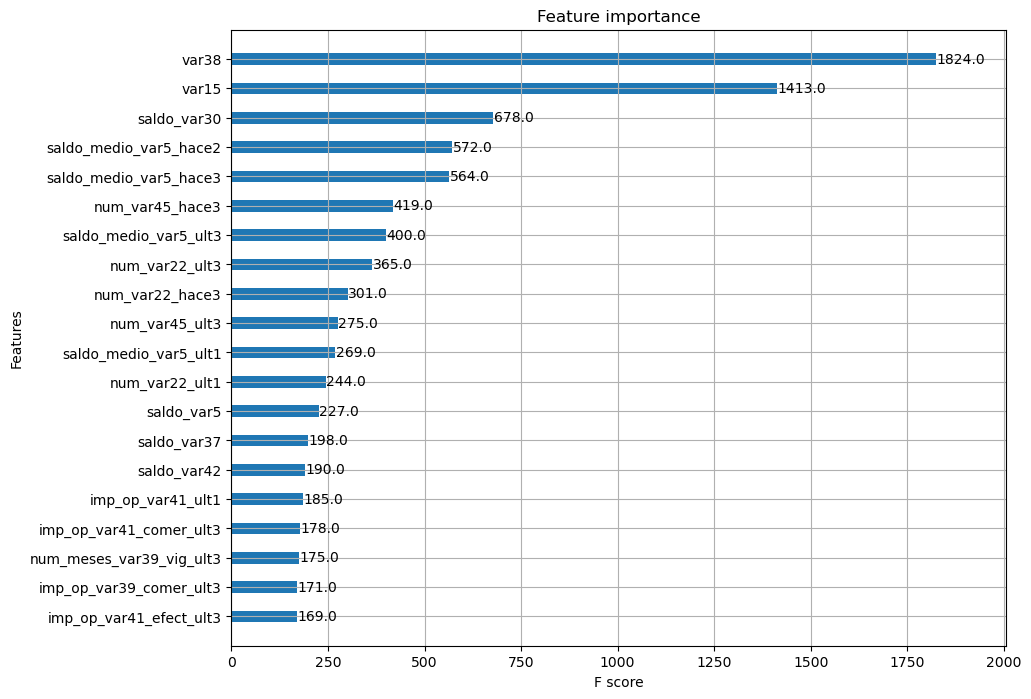

In [36]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

## 2) 주요 변수 해석

본 데이터는 익명화된 변수명을 사용하고 있으나,    
`var15`는 값의 범위와 커뮤니티 검토를 통해 고객 나이로,    
`var38`은 극단적인 값 분포와 높은 중요도를 바탕으로 고객 자산 혹은 계좌 잔고로 해석되며,    
`saldo_` 계열 변수들은 스페인어 기반 변수명에서 유추할 때 상품별 잔액 관련 변수일 가능성이 높다.

(1) var38 (모델 중요도 1위)   
- 가장 중요한 변수이며, 모델이 이 변수에 강하게 의존하는 양상을 보인다.   
- 컬럼에 들어있는 값이 수백만 단위의 큰 숫자들이 많다.   
-  현실적으로도 자산 수준은 고객 만족도나 이탈 가능성과 매우 강한 상관관계를 가지는 변수이다.

(2) var15   
- 값 범위가 0~100 사이의 정수의 값을 가지는 칼럼이다.   
- 대부분의 값이 20~90대 안에 있으며, 사람 나이와 유사한 분포를 가진다.   
- 만족 여부에 따라 평균값이 달라지기도 해서 나이에 기반한 분포 분석이 가능하다.

(3) saldo_var30
- saldo_ 접두어는 스페인어에서 "잔액(balance)"라는 뜻을 가지고 있다.  
- 계좌 관련 잔액으로 추정한다.   
- `saldo_var5`, `saldo_var37`, `saldo_var42` 같은 유사 변수도 존재해서 상품별 잔액으로 추정한다.   

In [41]:
# 데이터 집단의 특성을 알아보기

df['TARGET'] = y_target

# 불만족 고객만 따로 보기
unsat = df[df['TARGET'] == 1]

# 예시: var38 (잔고), var15 (나이) 평균 비교
print("평균")
print(f"\n var38 불만족 고객 잔고: {unsat['var38'].mean()} \n var38  만족 고객 잔고: {df[df['TARGET'] == 0]['var38'].mean()}")
print(f"\n var15 불만족 고객 나이: {unsat['var15'].mean()} \n var15  만족 고객 나이: {df[df['TARGET'] == 0]['var15'].mean()}")


평균

 var38 불만족 고객 잔고: 99678.28059046787 
 var38  만족 고객 잔고: 117959.15691778208

 var15 불만족 고객 나이: 39.68051861702128 
 var15  만족 고객 나이: 32.94640607023503


# 5. 인사이트 도출

## 1) 불만족 고객(Target=1) 특성 분석
(1) 불만족 고객의 잔고가 평균적으로 18,000 정도 더 낮다.    
- 자산이 적은 고객일수록 불만족 가능성이 높다는 의미로 해석 가능하다.   
- 실무적으로는 경제적 여유가 적은 고객군의 니즈를 충족시키지 못했을 가능성 있디. 

## 2) 그 특성에 맞는 개선/운영 전략 제안
(1) 예시: 잔고가 적고, 거래가 거의 없는 고객군   

In [42]:
# 불만족 고객 비율

target_counts = df['TARGET'].value_counts(normalize=True)
print(target_counts)

TARGET
0    0.960431
1    0.039569
Name: proportion, dtype: float64


In [44]:
# 잔고, 나이, 거래수 평균 비교

key_vars = ['var38', 'var15', 'saldo_var30']
for var in key_vars:
    mean_unset = df[df['TARGET']==1][var].mean()
    mean_sat = df[df['TARGET']==0][var].mean()
    print(f"{var} 평균-불만족: {mean_unset:.2f}, 만족: {mean_sat:.2f}")

var38 평균-불만족: 99678.28, 만족: 117959.16
var15 평균-불만족: 39.68, 만족: 32.95
saldo_var30 평균-불만족: 2164.36, 만족: 14154.09


In [46]:

# 시스템 환경에 따라 폰트를 자동으로 설정해주는 함수
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        return "AppleGothic"
    elif system_name == "Windows":
        return "Malgun Gothic"
    else:
        # Linux (Colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        return "NanumBarunGothic"

# 한글 폰트 적용
plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 레티나 디스플레이 설정 (선명하게)
%config InlineBackend.figure_format = 'retina'



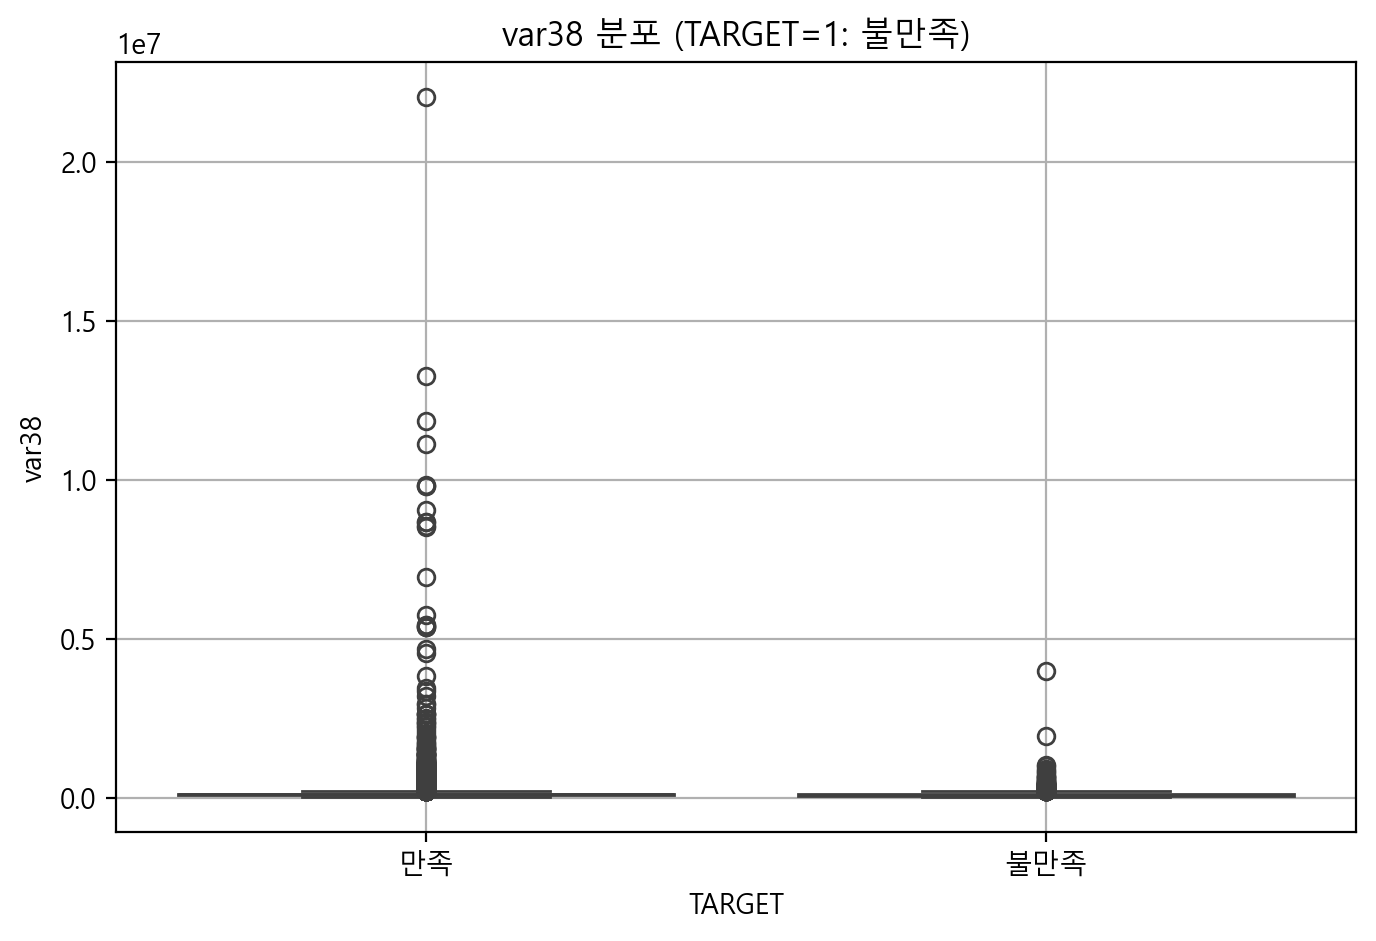

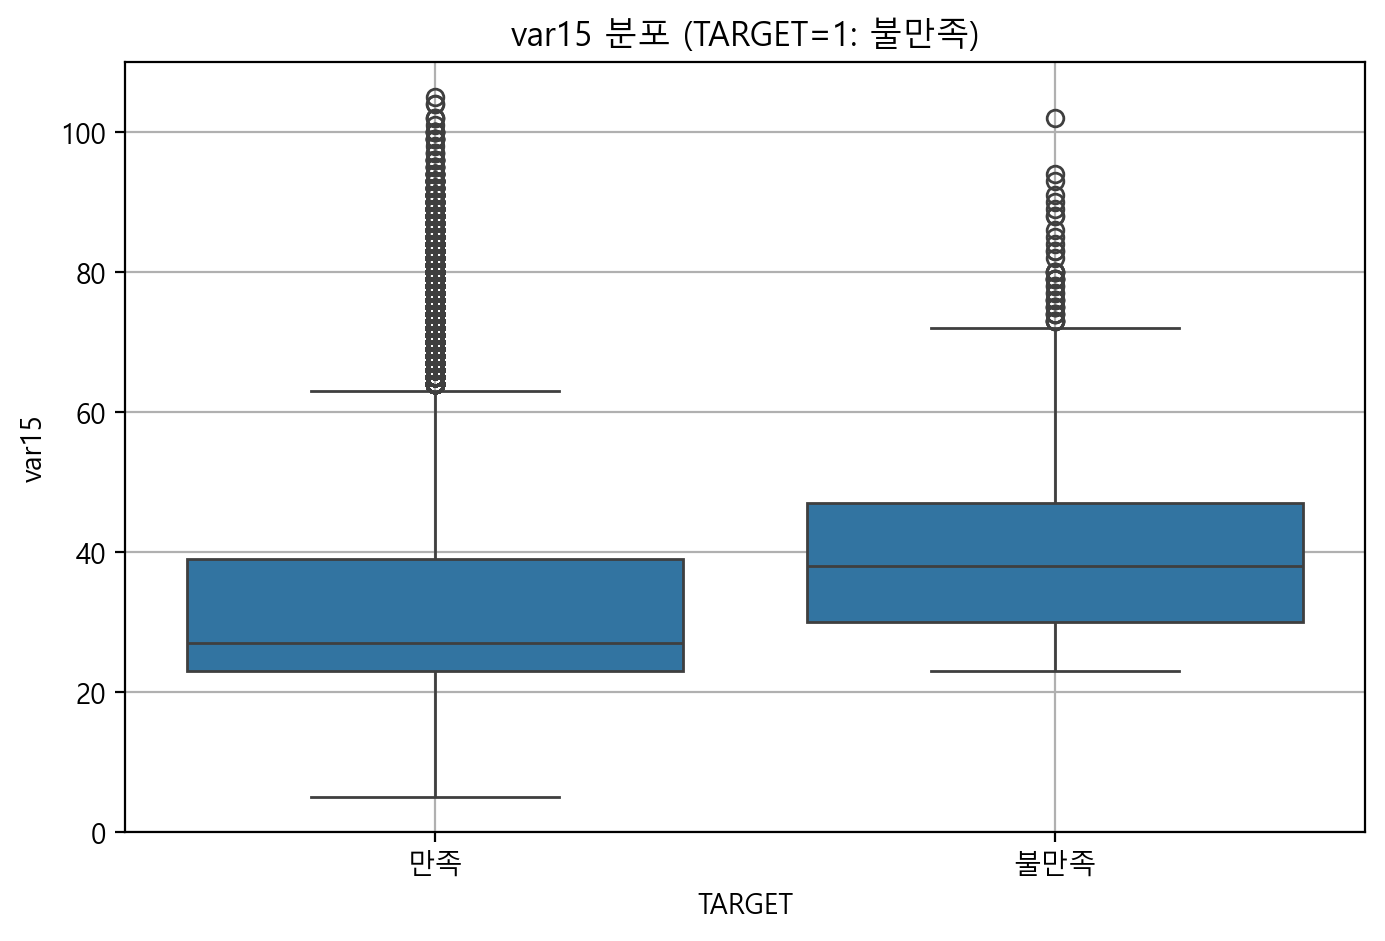

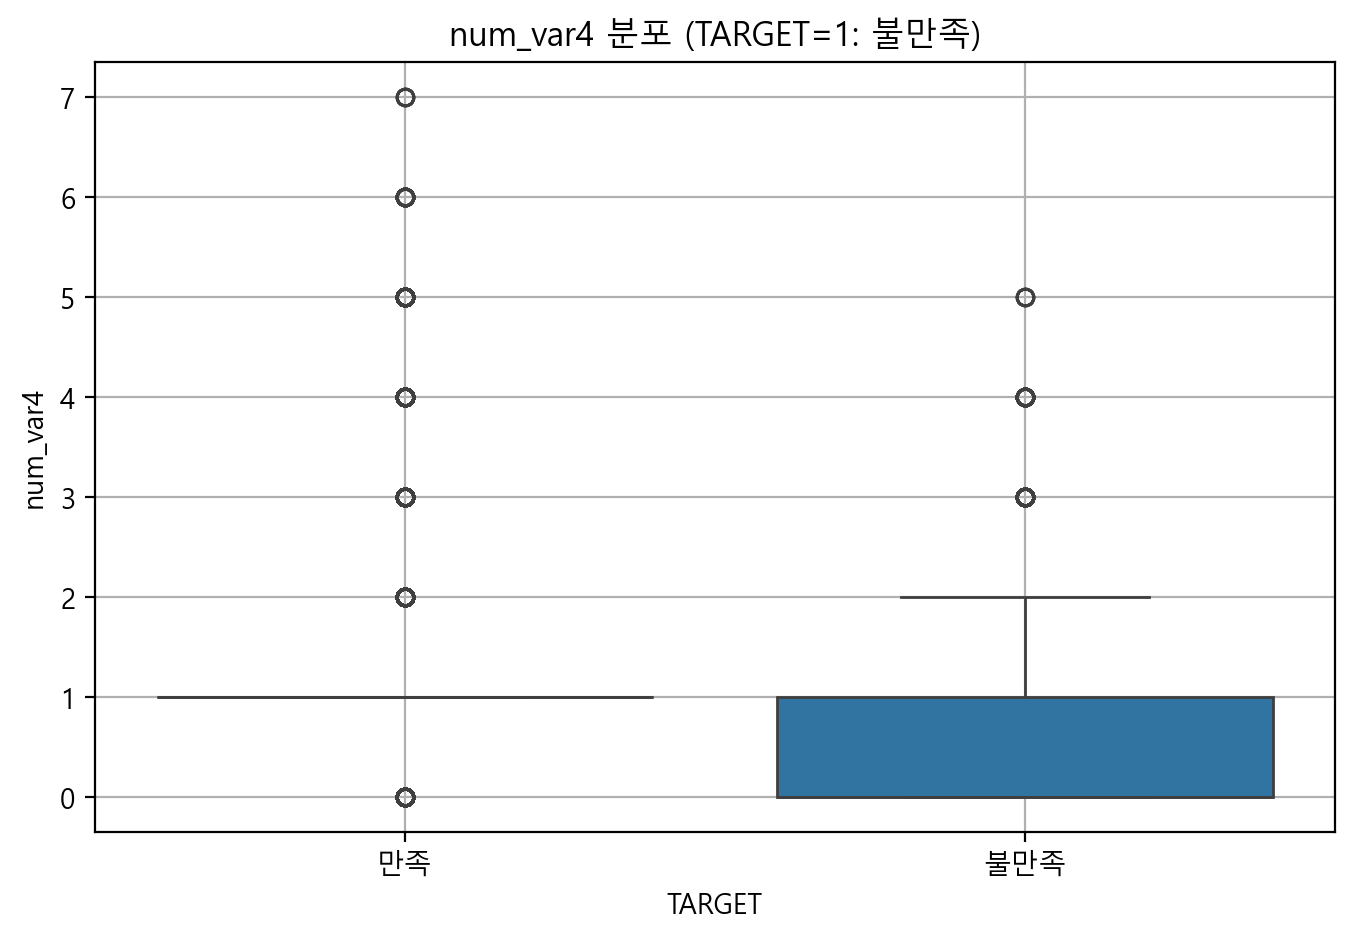

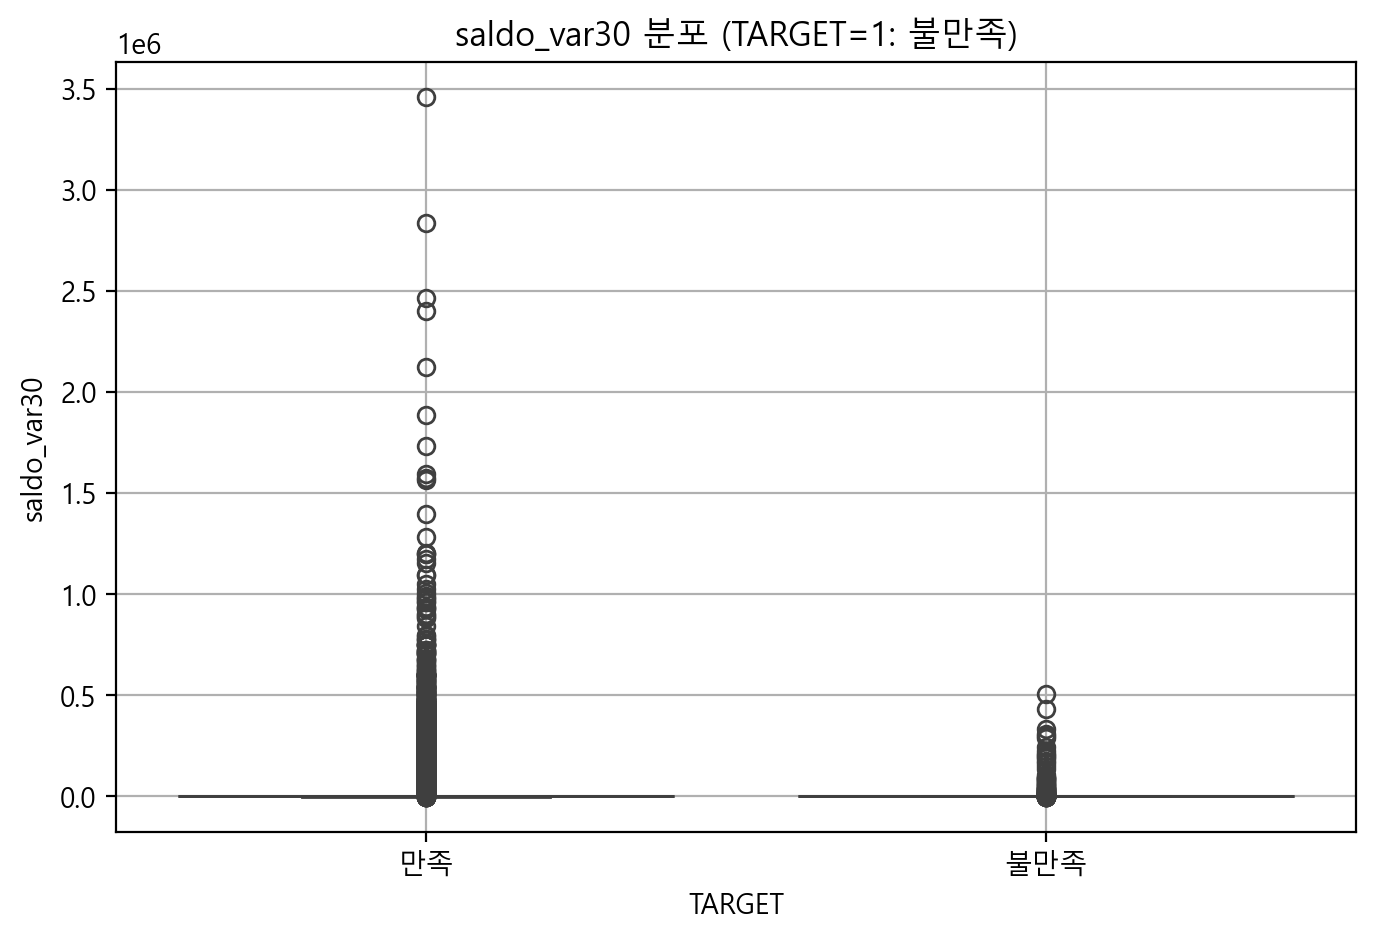

In [47]:
# 변수별 분포 차이
import seaborn as sns
import matplotlib.pyplot as plt

# 보기 쉽게 변수 리스트 압축
vars_to_plot = ['var38', 'var15', 'num_var4', 'saldo_var30']

# 각 변수에 대해 Boxplot 그리기
for var in vars_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='TARGET', y=var)
    plt.title(f'{var} 분포 (TARGET=1: 불만족)')
    plt.xticks([0, 1], ['만족', '불만족'])
    plt.grid(True)
    plt.show()


박스가 위쪽으로 길면 평균값이 크다.   
불만족 고객 쪽 박스가 낮고 작다면, 해당 변수의 수치가 낮은 고객일수록 불만족일 경향이 있다.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26864\1054795839.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['TARGET']==0][var], label='만족', shade=True, ax=axes[i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26864\1054795839.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['TARGET']==1][var], label='불만족', shade=True, ax=axes[i], color='red', alpha=0.1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26864\1054795839.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['TARGET']==0][var], label='만족', shade=True, ax=axes[i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26864\1054795839.py:9: FutureW

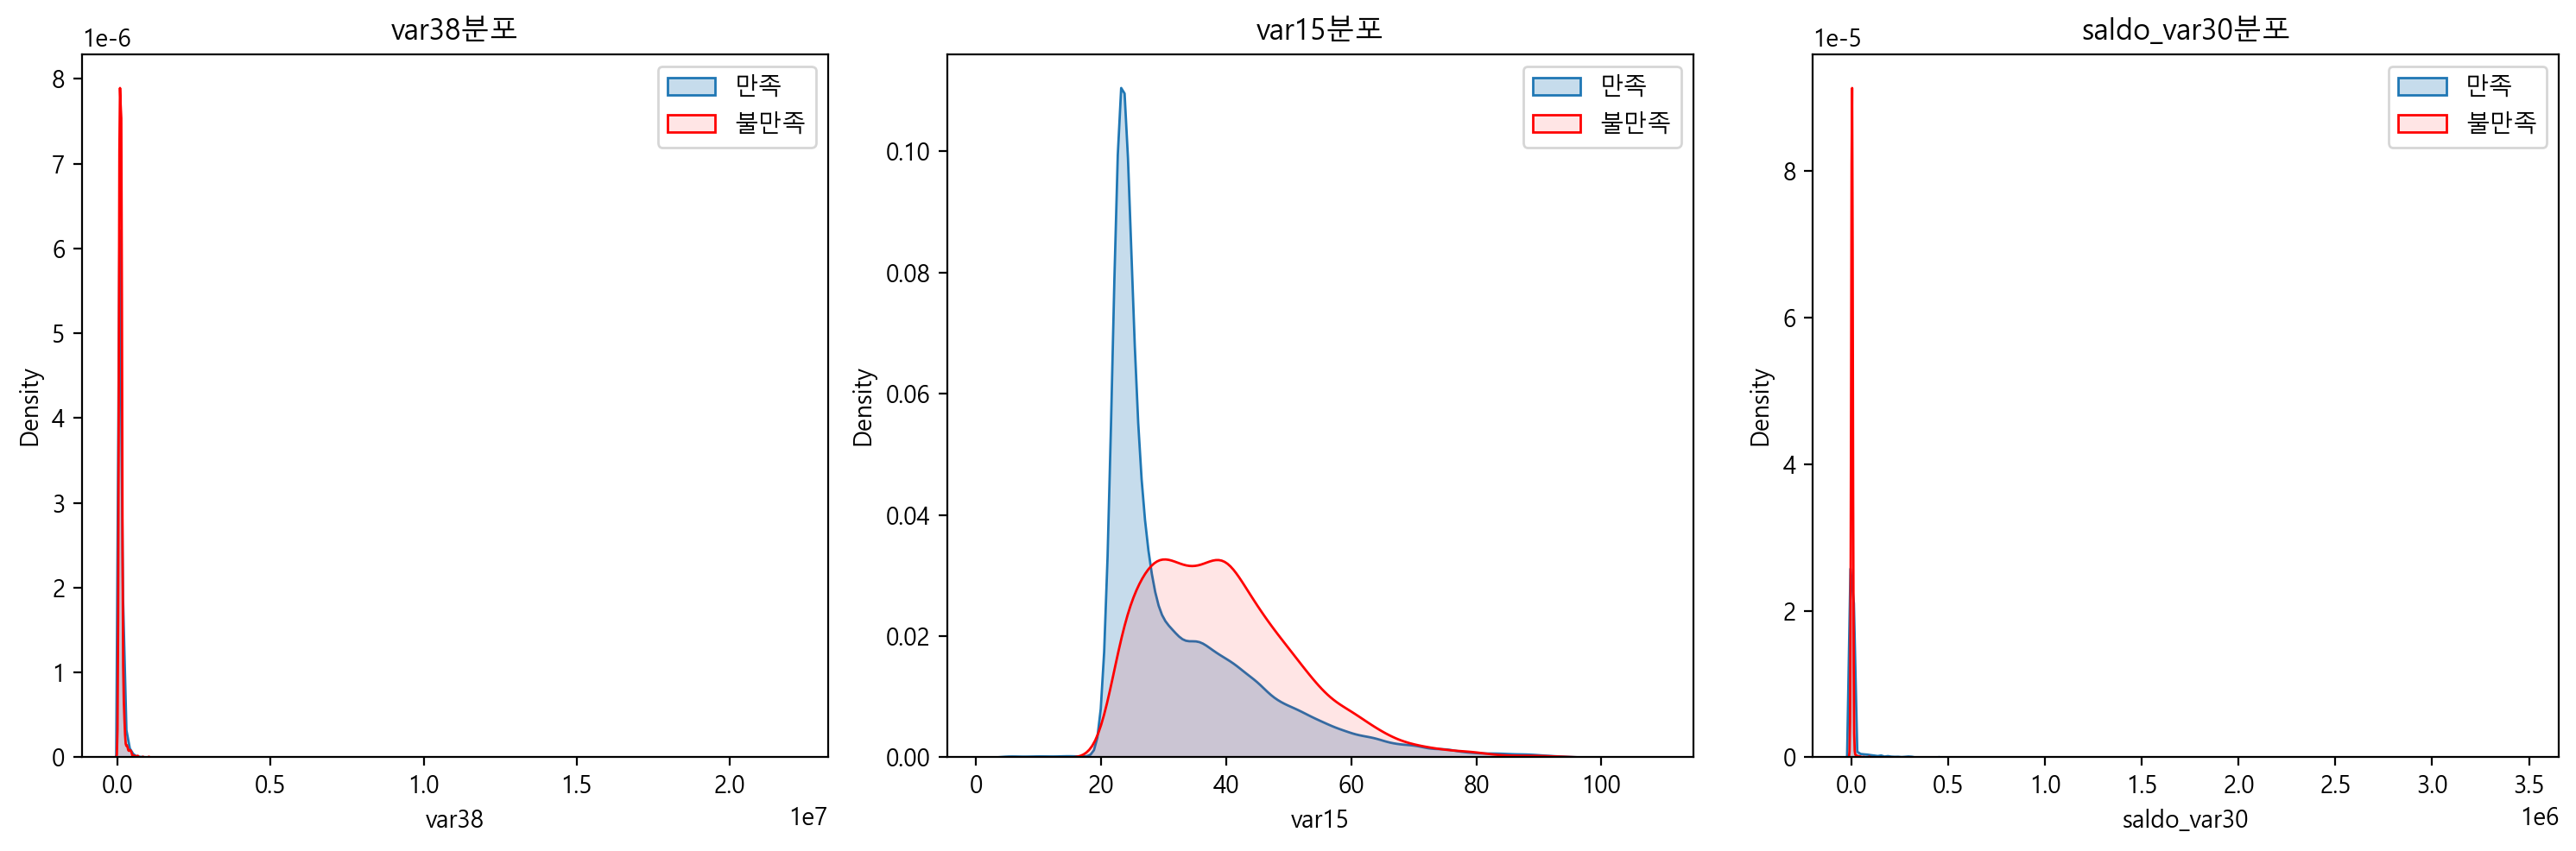

In [ ]:
# kde그래프 (나이, 잔고 밀도)

vars_to_plot = ['var38', 'var15', 'saldo_var30']

fig, axes = plt.subplots(1, len(vars_to_plot), figsize=(15,5))

for i, var in enumerate(vars_to_plot):
    sns.kdeplot(df[df['TARGET']==0][var], label='만족', shade=True, ax=axes[i])
    sns.kdeplot(df[df['TARGET']==1][var], label='불만족', shade=True, ax=axes[i], color='red', alpha=0.1)
    axes[i].set_title(f'{var}분포')
    axes[i].legend()
    
plt.tight_layout()
plt.show()
                
                
    
